**Is an ensemble learning technique that combines multiple weak learners to form a strong learner**

1. Weak Learners : whose accurcy is just over 50 %.
2. Decision stumps : Decision tree whose max depth is 1. 

We mostly use descision stumps as the weak learner in Adaboost.

3. +1 and -1.

We keep on adding stumps to the existing net after upsampling the wrong ones, also calulating weights. 

The result will be = alpha_1*(+ or - 1) + alpha_2* (+ or -)...

The initial weight will be 1/total_rows

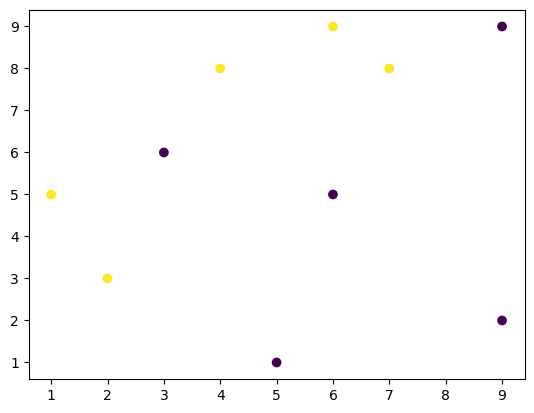

In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
x=pd.DataFrame()
x['1']=[1,2,3,4,5,6,6,7,9,9]
x['2']=[5,3,6,8,1,9,5,8,9,2]
y=[1,1,0,1,0,1,0,1,0,0]
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y)
plt.show()

In [2]:
x['weights']=1/x.shape[0]
x

,1,2,weights
0,1,5,0.1
1,2,3,0.1
2,3,6,0.1
3,4,8,0.1
4,5,1,0.1
5,6,9,0.1
6,6,5,0.1
7,7,8,0.1
8,9,9,0.1
9,9,2,0.1


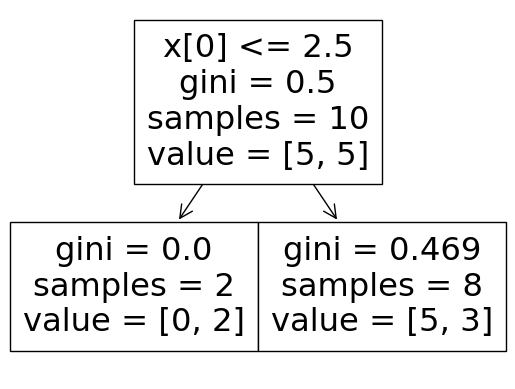

In [3]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model=DecisionTreeClassifier(max_depth=1)
model.fit(x,y)
plot_tree(model)
x['pred']=model.predict(x)

In [4]:
from sklearn.metrics import accuracy_score
import numpy as np
x['label']=y
error=np.round(1-accuracy_score(x['label'],x['pred']),1)
print(error)
print(x)
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error+0.0000001))
alpha=calculate_model_weight(error)
def update_row_weights(row):
    if(row['label']==row['pred']):
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)
x['updated_weights']=x.apply(update_row_weights,axis=1)
x

0.3
   1  2  weights  pred  label
0  1  5      0.1     1      1
1  2  3      0.1     1      1
2  3  6      0.1     0      0
3  4  8      0.1     0      1
4  5  1      0.1     0      0
5  6  9      0.1     0      1
6  6  5      0.1     0      0
7  7  8      0.1     0      1
8  9  9      0.1     0      0
9  9  2      0.1     0      0


,1,2,weights,pred,label,updated_weights
0,1,5,0.1,1,1,0.065465
1,2,3,0.1,1,1,0.065465
2,3,6,0.1,0,0,0.065465
3,4,8,0.1,0,1,0.152752
4,5,1,0.1,0,0,0.065465
5,6,9,0.1,0,1,0.152752
6,6,5,0.1,0,0,0.065465
7,7,8,0.1,0,1,0.152752
8,9,9,0.1,0,0,0.065465
9,9,2,0.1,0,0,0.065465


In [5]:
print(x['updated_weights'].sum())
x['normalised']=x['updated_weights']/x['updated_weights'].sum()
print(x['normalised'].sum())
x


0.9165151389911806
1.0


,1,2,weights,pred,label,updated_weights,normalised
0,1,5,0.1,1,1,0.065465,0.071429
1,2,3,0.1,1,1,0.065465,0.071429
2,3,6,0.1,0,0,0.065465,0.071429
3,4,8,0.1,0,1,0.152752,0.166667
4,5,1,0.1,0,0,0.065465,0.071429
5,6,9,0.1,0,1,0.152752,0.166667
6,6,5,0.1,0,0,0.065465,0.071429
7,7,8,0.1,0,1,0.152752,0.166667
8,9,9,0.1,0,0,0.065465,0.071429
9,9,2,0.1,0,0,0.065465,0.071429


In [6]:
# blah blah blah

we have to tune between n_estimators and learning_rate , there is a trade of between this

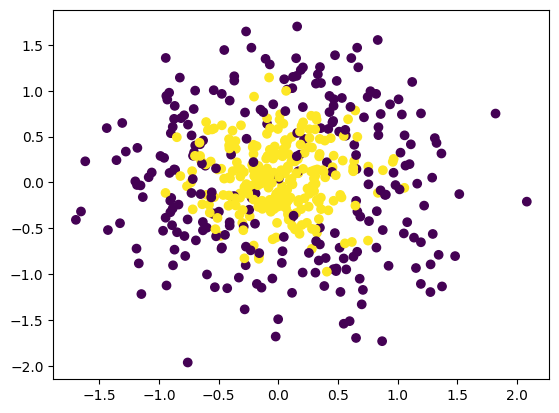

In [7]:
from sklearn.datasets import make_circles
x,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42,)
plt.scatter(x[:,1],x[:,0],c=y)
plt.show()

In [8]:
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
model=AdaBoostClassifier(algorithm='SAMME')
np.mean(cross_val_score(model,x,y,cv=10))

0.812

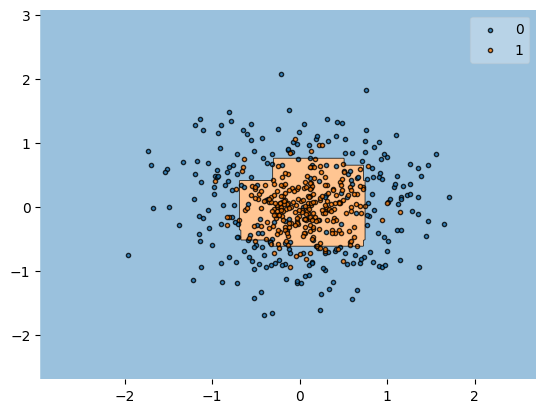

0.854


In [17]:
from IPython.display import clear_output
import time
for i in range(1,10):
    model=AdaBoostClassifier(algorithm='SAMME',n_estimators=i*10)
    time.sleep(1)
    model.fit(x,y)
    plot_decision_regions(x,y,model,markers='.')
    plt.show()
    print(accuracy_score(y,model.predict(x)))
    clear_output(wait=True)

learning_rate -> proporional to alpha, which helps us to tune the weights.hence for each updation we can tune how much we can make the next wrong points increase or decrease their weights.

hence if less learning rate less overfitting for more number of estimators.

and if less estimators more learning rate helps to reach solution in less number of steps.

In [21]:
from sklearn.model_selection import GridSearchCV
grid=dict()
grid['n_estimators']=[10,50,100,500]
grid['learning_rate']=[0.001,0.01,0.1,0.5,1]
grid_dearch=GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME'),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy',verbose=True)
res=grid_dearch.fit(x,y)
print(res.best_params_,res.best_score_,res)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'learning_rate': 0.1, 'n_estimators': 500} 0.8320000000000001 GridSearchCV(cv=10, estimator=AdaBoostClassifier(algorithm='SAMME'), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='accuracy', verbose=True)


# What's the difference between bagging and boosting???

1. Type of model used:

    Bagging: we use LBHV Models(Fully grown decision tree).
    
    Boositing: HBLV models(descision stump) (HBHV i guess).

2. Sequential vs parallel learning: 

    Bagging: supports parallel learning.

    Boosting: sequential learning.

3. Weightage of base learners:

    Bagging: Equal weightage.

    Boosting: sequentially weights differ bassed on the error .(Normally the weights get decreased sequentially.)
     